# Final Project - Word Cloud

For this project, you'll create a "word cloud" from a text by writing a script.  This script needs to process the text, remove punctuation, ignore case and words that do not contain all alphabets, count the frequencies, and ignore uninteresting or irrelevant words.  A dictionary is the output of the `calculate_frequencies` function.  The `wordcloud` module will then generate the image from your dictionary.

For the input text of your script, you will need to provide a file that contains text only.  For the text itself, you can copy and paste the contents of a website you like.  Or you can use a site like [Project Gutenberg](https://www.gutenberg.org/) to find books that are available online.  You could see what word clouds you can get from famous books, like a Shakespeare play or a novel by Jane Austen. Save this as a .txt file somewhere on your computer.
<br><br>
Now you will need to upload your input file here so that your script will be able to process it.  To do the upload, you will need an uploader widget.  Run the following cell to perform all the installs and imports for your word cloud script and uploader widget.  It may take a minute for all of this to run and there will be a lot of output messages. But, be patient. Once you get the following final line of output, the code is done executing. Then you can continue on with the rest of the instructions for this notebook.
<br><br>
**Enabling notebook extension fileupload/extension...**
<br>
**- Validating: <font color =green>OK</font>**

In [8]:
# Here are all the installs and imports you will need for your word cloud script and uploader widget

!pip install wordcloud
!pip install fileupload
!pip install ipywidgets
!jupyter nbextension install --py --user fileupload
!jupyter nbextension enable --py fileupload

import wordcloud
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
import fileupload
import io
import sys

Installing /opt/conda/lib/python3.6/site-packages/fileupload/static -> fileupload
Up to date: /home/jovyan/.local/share/jupyter/nbextensions/fileupload/extension.js
Up to date: /home/jovyan/.local/share/jupyter/nbextensions/fileupload/widget.js
Up to date: /home/jovyan/.local/share/jupyter/nbextensions/fileupload/fileupload/widget.js
- Validating: OK

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable fileupload --user --py
    
Enabling notebook extension fileupload/extension...
      - Validating: OK


Whew! That was a lot. All of the installs and imports for your word cloud script and uploader widget have been completed. 
<br><br>
**IMPORTANT!** If this was your first time running the above cell containing the installs and imports, you will need save this notebook now. Then under the File menu above,  select Close and Halt. When the notebook has completely shut down, reopen it. This is the only way the necessary changes will take affect.
<br><br>
To upload your text file, run the following cell that contains all the code for a custom uploader widget. Once you run this cell, a "Browse" button should appear below it. Click this button and navigate the window to locate your saved text file.

In [9]:
# This is the uploader widget

def _upload():

    _upload_widget = fileupload.FileUploadWidget()

    def _cb(change):
        global file_contents
        decoded = io.StringIO(change['owner'].data.decode('utf-8'))
        filename = change['owner'].filename
        print('Uploaded `{}` ({:.2f} kB)'.format(
            filename, len(decoded.read()) / 2 **10))
        file_contents = decoded.getvalue()

    _upload_widget.observe(_cb, names='data')
    display(_upload_widget)

_upload()

FileUploadWidget(label='Browse', _dom_classes=('widget_item', 'btn-group'))

The uploader widget saved the contents of your uploaded file into a string object named *file_contents* that your word cloud script can process. This was a lot of preliminary work, but you are now ready to begin your script. 

Write a function in the cell below that iterates through the words in *file_contents*, removes punctuation, and counts the frequency of each word.  Oh, and be sure to make it ignore word case, words that do not contain all alphabets and boring words like "and" or "the".  Then use it in the `generate_from_frequencies` function to generate your very own word cloud!
<br><br>
**Hint:** Try storing the results of your iteration in a dictionary before passing them into wordcloud via the `generate_from_frequencies` function.

In [12]:
file_contents = """It was quite by accident I discovered this incredible invasion of
Earth by lifeforms from another planet. As yet, I haven't done 
anything about it; I can't think of anything to do. I wrote to the
Government, and they sent back a pamphlet on the repair and
maintenance of frame houses. Anyhow, the whole thing is known; I'm not
the first to discover it. Maybe it's even under control.

I was sitting in my easy-chair, idly turning the pages of a
paperbacked book someone had left on the bus, when I came across the
reference that first put me on the trail. For a moment I didn't
respond. It took some time for the full import to sink in. After I'd
comprehended, it seemed odd I hadn't noticed it right away.

The reference was clearly to a nonhuman species of incredible
properties, not indigenous to Earth. A species, I hasten to point out,
customarily masquerading as ordinary human beings. Their disguise,
however, became transparent in the face of the foll
owing observations
by the author. It was at once obvious the author knew everything. Knew
everything--and was taking it in his stride. The line (and I tremble
remembering it even now) read:

    _... his eyes slowly roved about the room._


Vague chills assailed me. I tried to picture the eyes. Did they roll
like dimes? The passage indicated not; they seemed to move through the
air, not over the surface. Rather rapidly, apparently. No one in the
story was surprised. That's what tipped me off. No sign of amazement
at such an outrageous thing. Later the matter was amplified.

    _... his eyes moved from person to person._

There it was in a nutshell. The eyes had clearly come apart from the
rest of him and were on their own. My heart pounded and my breath
choked in my windpipe. I had stumbled on an accidental mention of a
totally unfamiliar race. Obviously non-Terrestrial. Yet, to the
characters in the book, it was perfectly natural--which suggested they
belonged to the same species.

And the author? A slow suspicion burned in my mind. The author was
taking it rather _too easily_ in his stride. Evidently, he felt this
was quite a usual thing. He made absolutely no attempt to conceal this
knowledge. The story continued:

    _... presently his eyes fastened on Julia._"""


def calculate_frequencies(file_contents):
    # Here is a list of punctuations and uninteresting words you can use to process your text
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    uninteresting_words = ["the", "a", "to", "if", "is", "it", "of", "and", "or", "an", "as", "i", "me", "my", \
    "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", \
    "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
    "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
    "all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "just"]
    
    # LEARNER CODE START HERE
    frequencies =  {}
    taken = []
    for letter in punctuations:
        file_contents =  file_contents.replace(letter,'')
    for word in uninteresting_words:
        w = ' '+word+' '
        file_contents = file_contents.replace(w,' ')
    for word in file_contents.split():
        if word.lower() not in taken:
            taken.append(word.lower())
            if word not in frequencies:
                frequencies[word] = 1
            else:
                frequencies[word] += 1
    #wordcloud
    cloud = wordcloud.WordCloud()
    cloud.generate_from_frequencies(frequencies)
    return cloud.to_array()

If you have done everything correctly, your word cloud image should appear after running the cell below.  Fingers crossed!

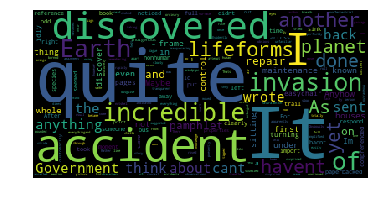

In [13]:
# Display your wordcloud image

myimage = calculate_frequencies(file_contents)
plt.imshow(myimage, interpolation = 'nearest')
plt.axis('off')
plt.show()

If your word cloud image did not appear, go back and rework your `calculate_frequencies` function until you get the desired output.  Definitely check that you passed your frequecy count dictionary into the `generate_from_frequencies` function of `wordcloud`. Once you have correctly displayed your word cloud image, you are all done with this project. Nice work!